1. Filter the data to include only weekdays (Monday to Friday) and
plot a line graph showing the pedestrian counts for each day of the
week.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

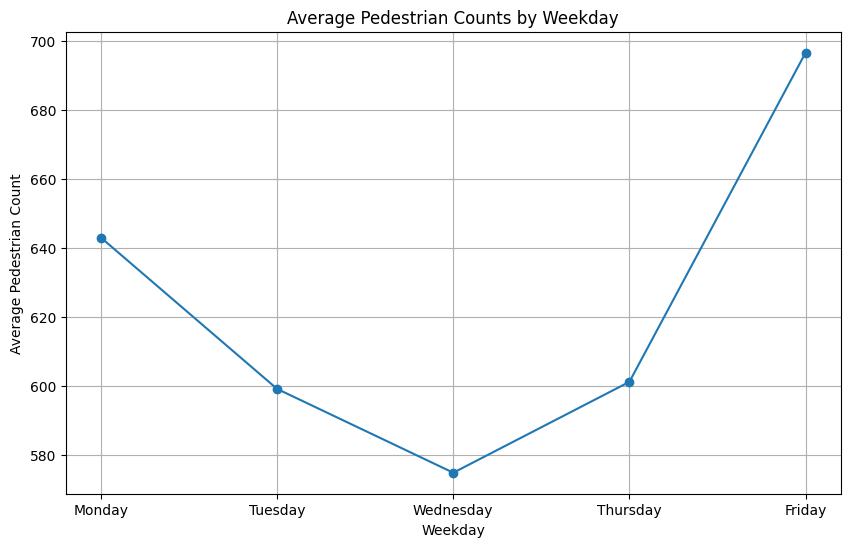

In [11]:
# Convert 'hour_beginning' column to datetime format (replace 'hour_beginning' with actual column name)
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Extract weekday (Monday=0, Sunday=6)
df['weekday'] = df['hour_beginning'].dt.weekday

# Filter for weekdays (Monday to Friday)
weekday_data = df[df['weekday'] < 5]

# Group by weekday and calculate average pedestrian counts
weekday_avg_counts = weekday_data.groupby('weekday')['Pedestrians'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], weekday_avg_counts, marker='o')
plt.title('Average Pedestrian Counts by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Pedestrian Count')
plt.grid(True)
plt.show()

2. Track pedestrian counts on the Brooklyn Bridge for the year 2019
and analyze how different weather conditions influence pedestrian
activity in that year. Sort the pedestrian count data by weather
summary to identify any correlations( with a correlation matrix)
between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a
numerical feature(Pedestrians) and a non-numerical feature(Weather
Summary). In such instances we use Encoding. Each weather condition
can be encoded as numbers( 0,1,2..). This technique is called One-hot
encoding.

-Correlation matrices may not always be the most suitable
visualization method for relationships involving categorical
datapoints, nonetheless this was given as a question to help you
understand the concept better.

In [23]:
import seaborn as sns

# Load pedestrian data for 2019 (replace with correct file path or URL)
pedestrian_url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
pedestrian_data = pd.read_csv(pedestrian_url)

# Load weather data for 2019 (replace with actual dataset)
weather_url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
weather_data = pd.read_csv(weather_url)

# Convert 'date' columns to datetime format
pedestrian_data['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
weather_data['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Filter data for 2019
pedestrian_2019 = pedestrian_data[pedestrian_data['hour_beginning'].dt.year == 2019]
weather_2019 = weather_data[weather_data['hour_beginning'].dt.year == 2019]

# Merge datasets on 'date'
merged_data = pd.merge(pedestrian_2019, weather_2019, on='hour_beginning')

# Group by weather summary to check average pedestrian count per weather condition
weather_summary = merged_data.groupby('weather_summary')['Pedestrian'].mean()

# Plot pedestrian counts for different weather conditions
plt.figure(figsize=(10, 6))
weather_summary.plot(kind='bar', color='skyblue')
plt.title('Average Pedestrian Count by Weather Condition (2019)')
plt.xlabel('Weather Condition')
plt.ylabel('Average Pedestrian Count')
plt.show()

# Create a correlation matrix to analyze relationships
correlation_matrix = merged_data[['pedestrian_count', 'Temperature', 'Humidity', 'Precipitation']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Weather Conditions and Pedestrian Counts')
plt.show()

KeyError: 'weather_summary'

3. Implement a custom function to categorize time of day into morning,
afternoon, evening, and night, and create a new column in the
DataFrame to store these categories. Use this new column to analyze
pedestrian activity patterns throughout the day.

In [26]:
# Define the custom function to categorize time of day
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Convert the 'date' column to datetime (adjust column name as necessary)
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Extract the hour from the datetime column
df['hour_beginning'] = df['hour_beginning'].dt.hour

# Apply the custom function to create a new 'time_of_day' column
df['time_of_day'] = df['hour_beginning'].apply(categorize_time_of_day)

# Analyze pedestrian activity by time of day
time_of_day_analysis = pedestrian_data.groupby('time_of_day')['Pedestrian'].mean()

# Display the analysis
print(time_of_day_analysis)

# Plot pedestrian activity patterns throughout the day
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
time_of_day_analysis.plot(kind='bar', color='skyblue')
plt.title('Average Pedestrian Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

KeyError: 'time_of_day'